In [3]:
!pip install torchsummaryX --quiet
from torchsummaryX import summary


In [1]:
import torch
import torch.nn as nn


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super().__init__()
        """
        My custom ResidualBlock

        [input]
        * in_channels  : input channel number
        * out_channels : output channel number
        * kernel_size  : kernel size
        * stride       : stride size

        [hint]
        * See the instruction PDF for details
        * Set the bias argument to False
        """

        ## Define all the layers
        # ----- TODO -----

        self.stride = stride
        self.in_channels = in_channels
        self.out_channels = out_channels
        # raise NotImplementedError

        # if the main longer path is choosen
        self.convolut1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding=1, bias=True)
        self.batchNorm1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.convolut2 = nn.Conv2d(out_channels, out_channels, kernel_size, stride=1, padding=1, bias=True)
        self.batchNorm2 = nn.BatchNorm2d(out_channels)

        # if the shorter path is chosen
        self.shortConv = nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=True)
        self.shortBatchNorm =nn.BatchNorm2d(out_channels)

    def forward(self, x):

        # ----- TODO -----
        # raise NotImplementedError
        short =self.shortConv(x)
        short_con = self.shortBatchNorm(short)

        main_con = self.convolut1(x)
        main_con = self.batchNorm1(main_con)
        main_con= self.relu(main_con)
        main_con = self.convolut2(main_con)
        main_con = self.batchNorm2(main_con)

        # combine main con adn short con
        combined =  main_con + short_con
        output = self.relu(combined)
        return output


class MyResnet(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super().__init__()

        """
        My custom ResNet.

        [input]
        * in_channels  : input channel number
        * num_classes  : number of classes

        [hint]
        * See the instruction PDF for details
        * Set the bias argument to False
        """

        ## Define all the layers
        # ----- TODO -----
        # raise NotImplementedError
        self.block = nn.Sequential(
            nn.Conv2d(in_channels,out_channels=64,kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # res blocks includes main and shortcut paths
        self.res_block_1 = ResidualBlock(64, 128, kernel_size=3, stride=2)
        self.res_block_2 = ResidualBlock(128, 256, kernel_size=3, stride=2)
        self.res_block_3 = ResidualBlock(256, 512, kernel_size=3, stride=2)
        # Pooling
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # fc
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x, return_embed=False):
        """
        Forward path.

        [input]
        * x             : input data
        * return_embed  : whether return the feature map of the last conv layer or not

        [output]
        * output        : output data
        * embedding     : the feature map after the last conv layer (optional)

        [hint]
        * See the instruction PDF for network details
        * You want to set return_embed to True if you are dealing with CAM
        """

        # ----- TODO -----
        # raise NotImplementedError
        x = self.block(x)
        x = self.res_block_1(x)
        x = self.res_block_2(x)
        x = self.res_block_3(x)


        if return_embed:
          embedding = x
          x = self.avgpool(x)
          x = torch.flatten(x, 1)
          out = self.fc(x)
          return out, embedding
        else:
          x = self.avgpool(x)
          x = torch.flatten(x, 1)
          out = self.fc(x)
          return out
def init_weights_kaiming(m):

    """
    Kaming initialization.

    [input]
    * m : torch.nn.Module

    [hint]
    * Refer to the course slides/recitations for more details
    * Initialize the bias term in linear layer by a small constant, e.g., 0.01
    """

    if isinstance(m, nn.Conv2d):
        # ----- TODO -----
        # raise NotImplementedError
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')


    elif isinstance(m, nn.Linear):
        # ----- TODO -----
        # raise NotImplementedError
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        nn.init.constant_(m.bias, 0.01)

if __name__ == "__main__":

    # set model
    net = MyResnet(in_channels=3, num_classes=10)
    net.apply(init_weights_kaiming)

    # sanity check
    input = torch.randn((64, 3, 32, 32), requires_grad=True)

    output = net(input)
        # output = summary(net,input)

    print(output.shape)
    print("Expected output size:torch.Size([64, 10])" )

    #
    # expected sizes:
    # input
    # (64, 3, 32, 32)
    # first block:
    # (64, 64, 32, 32)
    # after first residual block:
    # (64, 128, 16, 16)
    # after second residual block:
    # (64, 256, 8, 8)
    # after third residual block
    # (64, 512, 4, 4)
    # after avg pooling:
    # (64, 512, 1, 1)
    # after flattening
    # (64, 512)
    # after fc
    # (64, 10)


torch.Size([64, 10])
Expected output size:torch.Size([64, 10])


100%|██████████| 170498071/170498071 [00:01<00:00, 86344401.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
LOAD DATASET: TRAIN/VAL | 50000/10000


Epoch 1/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.92it/s]


Epoch 1 - Train Loss: 1.3215, Train Accuracy: 0.5271, Val Loss: 1.0094, Val Accuracy: 0.6359


Epoch 2/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.57it/s]


Epoch 2 - Train Loss: 0.9033, Train Accuracy: 0.6792, Val Loss: 0.8884, Val Accuracy: 0.6930


Epoch 3/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 23.34it/s]


Epoch 3 - Train Loss: 0.7228, Train Accuracy: 0.7464, Val Loss: 0.7507, Val Accuracy: 0.7467


Epoch 4/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 20.75it/s]


Epoch 4 - Train Loss: 0.6175, Train Accuracy: 0.7835, Val Loss: 0.7404, Val Accuracy: 0.7518


Epoch 5/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.83it/s]


Epoch 5 - Train Loss: 0.5417, Train Accuracy: 0.8124, Val Loss: 0.6027, Val Accuracy: 0.7929


Epoch 6/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.29it/s]


Epoch 6 - Train Loss: 0.4859, Train Accuracy: 0.8322, Val Loss: 0.5733, Val Accuracy: 0.8055


Epoch 7/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 22.64it/s]


Epoch 7 - Train Loss: 0.4433, Train Accuracy: 0.8451, Val Loss: 0.5274, Val Accuracy: 0.8212


Epoch 8/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 23.26it/s]


Epoch 8 - Train Loss: 0.4018, Train Accuracy: 0.8609, Val Loss: 0.5727, Val Accuracy: 0.8144


Epoch 9/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.64it/s]


Epoch 9 - Train Loss: 0.3673, Train Accuracy: 0.8722, Val Loss: 0.5100, Val Accuracy: 0.8335


Epoch 10/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.06it/s]


Epoch 10 - Train Loss: 0.3378, Train Accuracy: 0.8833, Val Loss: 0.5381, Val Accuracy: 0.8267


Epoch 11/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.36it/s]


Epoch 11 - Train Loss: 0.2620, Train Accuracy: 0.9094, Val Loss: 0.4504, Val Accuracy: 0.8534


Epoch 12/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 21.35it/s]


Epoch 12 - Train Loss: 0.2387, Train Accuracy: 0.9184, Val Loss: 0.4542, Val Accuracy: 0.8539


Epoch 13/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.39it/s]


Epoch 13 - Train Loss: 0.2173, Train Accuracy: 0.9257, Val Loss: 0.4843, Val Accuracy: 0.8516


Epoch 14/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.67it/s]


Epoch 14 - Train Loss: 0.2009, Train Accuracy: 0.9293, Val Loss: 0.4416, Val Accuracy: 0.8588


Epoch 15/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 22.91it/s]


Epoch 15 - Train Loss: 0.1882, Train Accuracy: 0.9347, Val Loss: 0.4445, Val Accuracy: 0.8613


Epoch 16/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 22.52it/s]


Epoch 16 - Train Loss: 0.1673, Train Accuracy: 0.9431, Val Loss: 0.4352, Val Accuracy: 0.8614


Epoch 17/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.41it/s]


Epoch 17 - Train Loss: 0.1668, Train Accuracy: 0.9438, Val Loss: 0.4344, Val Accuracy: 0.8618


Epoch 18/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.82it/s]


Epoch 18 - Train Loss: 0.1470, Train Accuracy: 0.9498, Val Loss: 0.4519, Val Accuracy: 0.8590


Epoch 19/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.37it/s]


Epoch 19 - Train Loss: 0.1366, Train Accuracy: 0.9538, Val Loss: 0.4574, Val Accuracy: 0.8699


Epoch 20/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 20.89it/s]


Epoch 20 - Train Loss: 0.1334, Train Accuracy: 0.9531, Val Loss: 0.4483, Val Accuracy: 0.8658


Epoch 21/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.61it/s]


Epoch 21 - Train Loss: 0.0973, Train Accuracy: 0.9670, Val Loss: 0.4413, Val Accuracy: 0.8730


Epoch 22/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.05it/s]


Epoch 22 - Train Loss: 0.0856, Train Accuracy: 0.9717, Val Loss: 0.4172, Val Accuracy: 0.8789


Epoch 23/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 23.70it/s]


Epoch 23 - Train Loss: 0.0785, Train Accuracy: 0.9739, Val Loss: 0.4275, Val Accuracy: 0.8774


Epoch 24/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 21.91it/s]


Epoch 24 - Train Loss: 0.0756, Train Accuracy: 0.9749, Val Loss: 0.4428, Val Accuracy: 0.8757


Epoch 25/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.97it/s]


Epoch 25 - Train Loss: 0.0733, Train Accuracy: 0.9761, Val Loss: 0.4279, Val Accuracy: 0.8781


Epoch 26/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.33it/s]


Epoch 26 - Train Loss: 0.0708, Train Accuracy: 0.9764, Val Loss: 0.4320, Val Accuracy: 0.8804


Epoch 27/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 20.62it/s]


Epoch 27 - Train Loss: 0.0665, Train Accuracy: 0.9778, Val Loss: 0.4280, Val Accuracy: 0.8814


Epoch 28/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.89it/s]


Epoch 28 - Train Loss: 0.0665, Train Accuracy: 0.9777, Val Loss: 0.4457, Val Accuracy: 0.8808


Epoch 29/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 25.10it/s]


Epoch 29 - Train Loss: 0.0592, Train Accuracy: 0.9806, Val Loss: 0.4642, Val Accuracy: 0.8782


Epoch 30/30 - Validation: 100%|██████████| 79/79 [00:03<00:00, 24.59it/s]


Epoch 30 - Train Loss: 0.0582, Train Accuracy: 0.9809, Val Loss: 0.4547, Val Accuracy: 0.8803
Finished Training


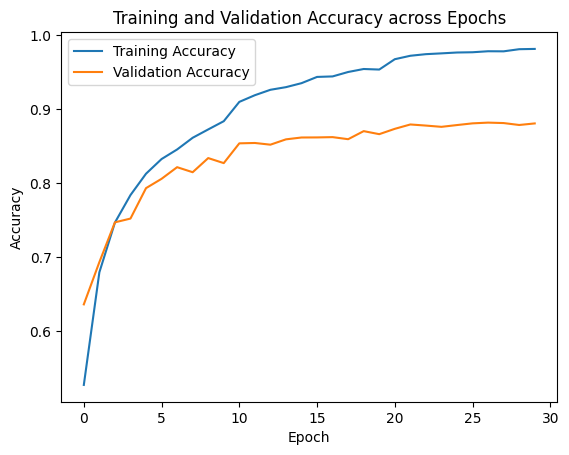

In [2]:
import os
import time
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm


def setup_seed(seed):

    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False






# set param
setup_seed(18786)
batch_size = 128
num_epoch = 30
lr = 1e-3
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Set model
## Set the device to Cuda if needed
## Initialize all the parameters
# ----- TODO -----
net = MyResnet(in_channels=3, num_classes=10)
net.apply(init_weights_kaiming)
net.to(DEVICE)


## Create the criterion and optimizer
# ----- TODO -----
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.6)

## Load dataset
normalize_param = dict(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(), transforms.ToTensor(),
    transforms.Normalize(**normalize_param,inplace=True)
    ])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(**normalize_param,inplace=True)
    ])

# ----- TODO -----
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=val_transform)
valloader = DataLoader(valset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
        'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(f"LOAD DATASET: TRAIN/VAL | {len(trainset)}/{len(valset)}")

train_loss =[]
val_loss = []
train_acc = []
val_acc = []




## Training and evaluation
## Feel free to record the loss and accuracy numbers
## Hint: you could separate the training and evaluation
## process into 2 different functions for each epoch
for epoch in range(num_epoch):
    # ----- TODO -----
    net.train()
    current_loss = 0
    current_correct = 0
    current_total = 0
    for data_in, label in tqdm(trainloader, desc=f"Epoch {epoch+1}/{num_epoch} - Training"):
        data_in, label  = data_in.to(DEVICE), label.to(DEVICE)
        optimizer.zero_grad()
        output = net(data_in)
        loss = criterion(output,label)
        loss.backward()
        optimizer.step()

        current_loss += loss.item()
        _, max_idx =torch.max(output,1)
        current_total += label.size(0)
        current_correct +=(max_idx ==label).sum().item()
    train_acc.append(current_correct/current_total)
    train_loss.append(current_loss/len(trainloader))


    net.eval()
    current_loss = 0
    current_correct = 0
    current_total = 0
    with torch.no_grad():
        for data_in, label in tqdm(valloader, desc=f"Epoch {epoch+1}/{num_epoch} - Validation"):
            data_in, label  = data_in.to(DEVICE), label.to(DEVICE)
            out = net(data_in)
            loss = criterion(out, label)
            current_loss += loss.item()
            max_val, max_index = torch.max(out.data,1)
            current_total += label.size(0)
            current_correct +=(max_index == label).sum().item()
    val_acc.append(current_correct/current_total)
    val_loss.append(current_loss / len(valloader))
    print(f"Epoch {epoch+1} - Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Accuracy: {val_acc[-1]:.4f}")

    scheduler.step()

print('Finished Training')

## Visualization
## Plot the loss and acc curves
# ----- TODO -----
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss across Epochs")
plt.savefig("loss_plot_del1-2.png")
plt.clf()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy across Epochs")
plt.savefig("accuracy_plot_del1-2.png")  # Save the plot as a PNG file

# def cam(net, inputs, labels, idx):

#     """
#     Calculate the CAM.

#     [input]
#     * net     : network
#     * inputs  : input data
#     * labels  : label data
#     * idx     : the index of the chosen image in a minibatch, range: [0, batch_size-1]

#     [output]
#     * cam_img : CAM result
#     * img     : raw image

#     [hint]
#     * Inputs and labels are in a minibatch form
#     * You can choose one images from them for CAM by idx.
#     """

#     net.eval()
#     DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     with torch.no_grad():

#         inputs = inputs.to(DEVICE)
#         labels = labels.to(DEVICE)

#         outputs, feat_map = net(inputs, return_embedding=True)

#         ## Find the class with highest probability
#         ## Obtain the weight related to that class
#         # ----- TODO -----
#         params = list(net.parameters())
#         print(params)
#         break
#         ## Calculate the CAM
#         ## Hint: you can choose one of the image (idx) from the batch for the following process
#         # ----- TODO -----
#         cam = None
#         cam = cam.detach().cpu().numpy()


#         ## Normalize CAM
#         ## Hint: Just minmax norm and rescale every value between [0-1]
#         ## You will want to resize the CAM result for a better visualization
#         ## e.g., the size of the raw image.
#         # ----- TODO -----
#         cam_img = None


#         ## Denormalize raw images
#         ## Hint: reverse the transform we did before
#         ## Change the image data type into uint8 for visualization
#         # ----- TODO -----
#         img = inputs[idx].permute(1,2,0).detach().cpu().numpy()
#         img = None

#         return cam_img, img

# ## Fetch the test image for CAM finish this later
# dataiter = iter(valloader)
# inputs, labels = next(dataiter)
# cam_img, img = cam(net, inputs, labels, idx=0) # idx could be changed


# ## Plot the CAM resuls as well as raw images
# ## Hint: You will want to resize the CAM result.
# # ----- TODO -----




In [3]:
def visualize_cam(cam_img, img,name):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cam_img, cmap='jet', alpha=0.5)
    plt.title("CAM Image")

    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(cam_img, cmap='jet', alpha=0.5)  # Overlay the CAM on the image
    plt.title("CAM Blended")
    plt.savefig(f'{name}.png')
    plt.close()  # Close the figure to prevent it from displaying in the output

    plt.show()


def cam(net, inputs, labels, idx):

    """
    Calculate the CAM.

    [input]
    * net     : network
    * inputs  : input data
    * labels  : label data
    * idx     : the index of the chosen image in a minibatch, range: [0, batch_size-1]

    [output]
    * cam_img : CAM result
    * img     : raw image

    [hint]
    * Inputs and labels are in a minibatch form
    * You can choose one images from them for CAM by idx.
    """

    net.eval()
    DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    with torch.no_grad():

        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        outputs, feature_maps = net(inputs, return_embed=True)
        feature_map = feature_maps[idx]

        ## Find the class with highest probability
        ## Obtain the weight related to that class
        # ----- TODO -----
        _, predicted_classes = torch.max(outputs, 1)
        idx_class = predicted_classes[idx].item()

        weights_class = net.fc.weight.data[idx_class]
        # print(weights_class.shape) # 512
        # print(feature_map.shape) [512, 4, 4]
        ## Calculate the CAM
        ## Hint: you can choose one of the image (idx) from the batch for the following process
        # ----- TODO -----
        num_features = feature_map.shape[0]
        weights_reshaped = weights_class.view(num_features, 1, 1)
        # calculate weighted sum of of feature maps with the target class weights
        weighted_feature_maps = weights_reshaped * feature_map # 512, 4, 4
        cam = weighted_feature_maps.sum(dim=0) # 4 x 4

        # ## Calculate the CAM
        # ## Hint: you can choose one of the image (idx) from the batch for the following process
        # # ----- TODO -----
        # cam = None
        # cam = cam.detach().cpu().numpy()


        # ## Normalize CAM
        # ## Hint: Just minmax norm and rescale every value between [0-1]
        # ## You will want to resize the CAM result for a better visualization
        # ## e.g., the size of the raw image.
        # # ----- TODO -----
        # cam_img = None
        cam = cam - cam.min()
        cam = cam / cam.max()
        cam = cam.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimension
        cam_img = torch.nn.functional.interpolate(cam, size=(inputs.shape[2], inputs.shape[3]), mode='bilinear', align_corners=False)
        cam_img = cam_img.squeeze().cpu().numpy()

        # ## Denormalize raw images
        # ## Hint: reverse the transform we did before
        # ## Change the image data type into uint8 for visualization
        # # ----- TODO -----
        # img = inputs[idx].permute(1,2,0).detach().cpu().numpy()
        # img = None
        img = inputs[idx].cpu().numpy()
        img = np.transpose(img, (1, 2, 0))

        img = img * np.array(normalize_param['std']) + np.array(normalize_param['mean'])
        img = np.clip(img, 0, 1)
        return cam_img, img

## Fetch the test image for CAM finish this later
cam_img_lst = []
img_lst = []
for i in range(100):
  dataiter = iter(valloader)
  inputs, labels = next(dataiter)
  cam_img, img = cam(net, inputs, labels, idx=i) # idx could be changed
  cam_img_lst.append(cam_img)
  img_lst.append(img)
  visualize_cam(cam_img, img,i)



## Plot the CAM resuls as well as raw images
## Hint: You will want to resize the CAM result.
# ----- TODO -----
